# Exercício 4 - FAV Enunciado Análise de Dados

**Importação de módulos**

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import pandas as pd

**Carregamento do ficheiro de dados**

In [2]:
filename_data_source = 'data/netflix1.csv'
df = pd.read_csv(filename_data_source)

**Primeira análise dos dados**

In [3]:
df.head(3)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"


In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [7]:
df.shape
#(8790, 10)

(8790, 10)

In [8]:
# Verificar o tipo de dados e valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [9]:
# Ver a percentagem de valores em falta por coluna
df.isnull().mean().sort_values(ascending=False) * 100

show_id         0.0
type            0.0
title           0.0
director        0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
dtype: float64

***

# Limpeza e Tratamento de Dados

In [10]:
# Remover duplicados (caso existam)
df.drop_duplicates(inplace=True)

In [11]:
# Normalizar colunas de texto (tirar espaços, capitalizar onde fizer sentido)
text_cols = ['type', 'title', 'director', 'country', 'rating']
for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.title()

In [12]:
# Converter a coluna 'date_added' para datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [13]:
# Separar a coluna 'duration' em número e tipo (minutos ou temporadas)
df[['duration_num', 'duration_type']] = df['duration'].str.extract(r'(\d+)\s*(min|season|seasons)', expand=True)
df['duration_num'] = pd.to_numeric(df['duration_num'], errors='coerce')
df['duration_type'] = df['duration_type'].str.capitalize().fillna('Desconhecido')

In [14]:
#  Converter 'release_year' para inteiro (já deve estar, mas confirmamos)
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

***

# Processamento de Dados

In [15]:
# Criar coluna com o número de palavras no título (pode indicar complexidade)
df['title_word_count'] = df['title'].apply(lambda x: len(str(x).split()))

In [16]:
# Contar número de títulos por ano de lançamento
titulos_por_ano = df['release_year'].value_counts().sort_index()

In [17]:
# Contar número de títulos por país (top 10)
top_paises = df['country'].value_counts().head(10)

In [18]:
# Contar número de títulos por tipo de duração (Min, Season, etc.)
duracao_por_tipo = df['duration_type'].value_counts()

In [19]:
# Extrair primeiro género da lista (coluna 'listed_in')
df['main_genre'] = df['listed_in'].astype(str).str.split(',').str[0].str.strip()


In [20]:
# Contar os 10 géneros principais
top_generos = df['main_genre'].value_counts().head(10)

In [21]:
# Contar títulos por tipo (Movie / TV Show) ao longo dos anos
titulos_por_tipo_ano = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)

***

# Visualização de Dados

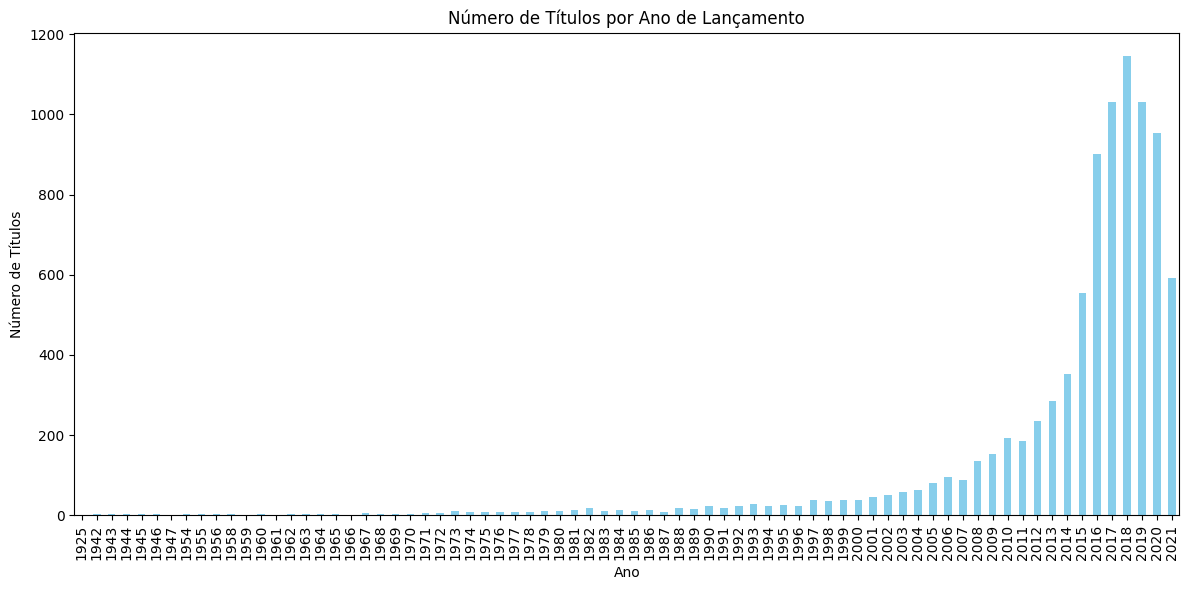

In [22]:
# Número de títulos por ano de lançamento
plt.figure(figsize=(12,6))
df['release_year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Número de Títulos por Ano de Lançamento')
plt.xlabel('Ano')
plt.ylabel('Número de Títulos')
plt.tight_layout()
plt.show()

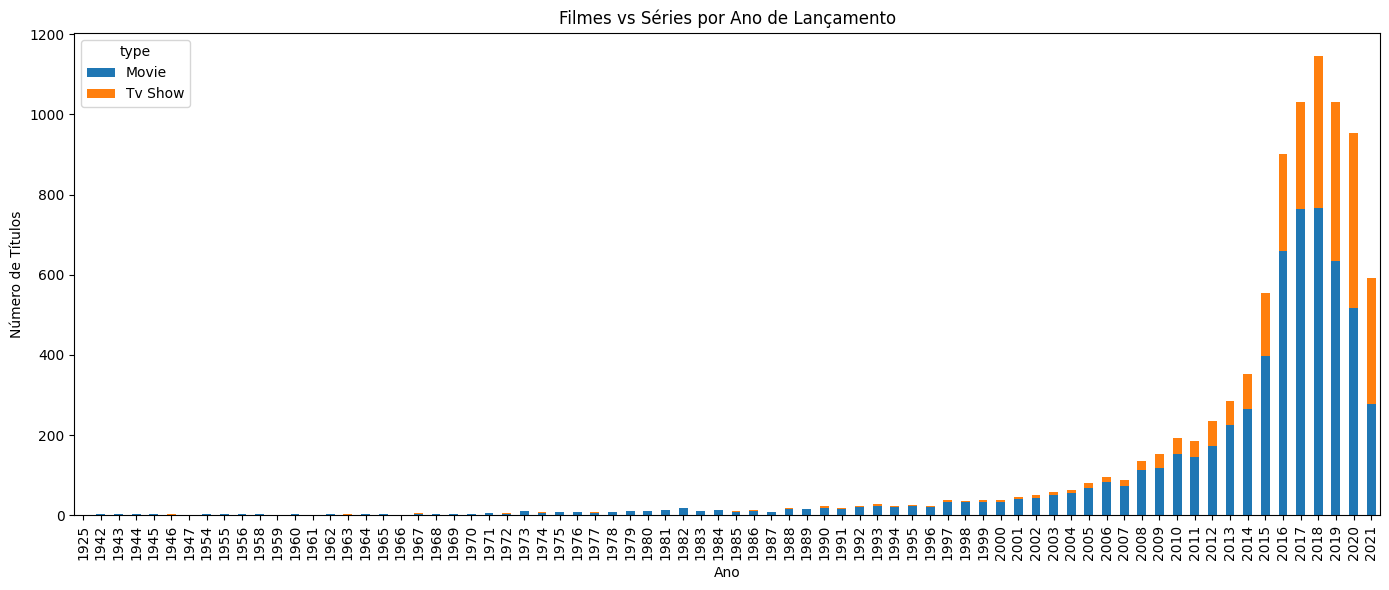

In [23]:
# Distribuição de filmes vs séries ao longo dos anos
titulos_por_tipo_ano.plot(kind='bar', stacked=True, figsize=(14,6))
plt.title('Filmes vs Séries por Ano de Lançamento')
plt.xlabel('Ano')
plt.ylabel('Número de Títulos')
plt.tight_layout()
plt.show()

C:\Users\jpedr\AppData\Local\Temp\ipykernel_23896\180670395.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_paises.values, y=top_paises.index, palette='mako')


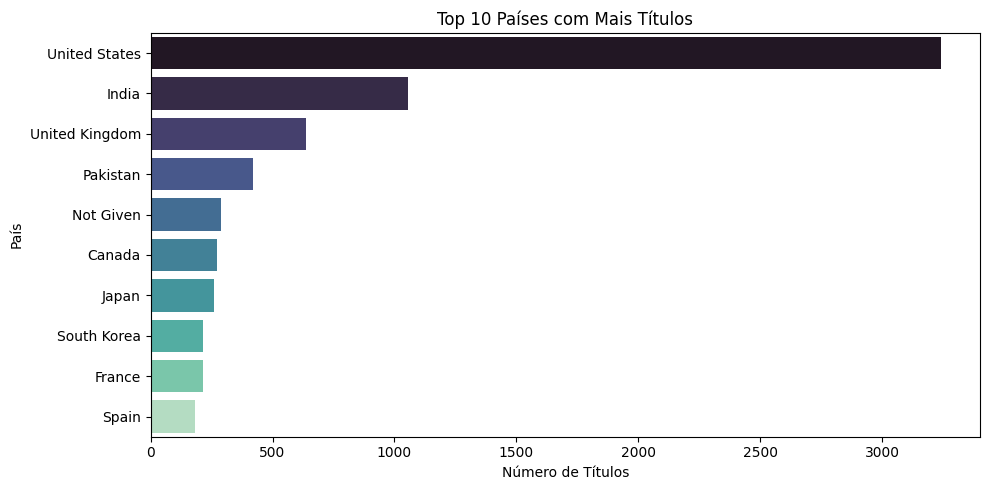

In [24]:
# Top 10 países com mais títulos
plt.figure(figsize=(10,5))
sns.barplot(x=top_paises.values, y=top_paises.index, palette='mako')
plt.title('Top 10 Países com Mais Títulos')
plt.xlabel('Número de Títulos')
plt.ylabel('País')
plt.tight_layout()
plt.show()

C:\Users\jpedr\AppData\Local\Temp\ipykernel_23896\1435671990.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='duration_type', order=df['duration_type'].value_counts().index, palette='pastel')


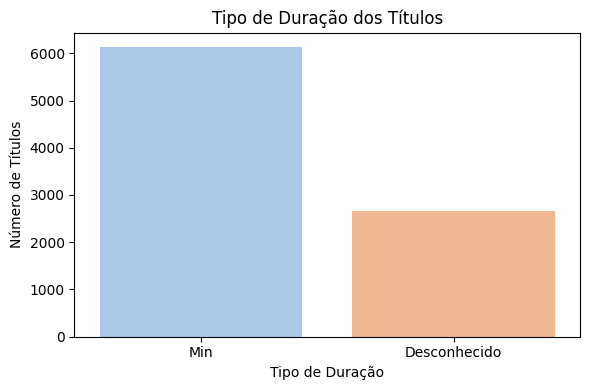

In [25]:
# Distribuição por tipo de duração (minutos ou temporadas)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='duration_type', order=df['duration_type'].value_counts().index, palette='pastel')
plt.title('Tipo de Duração dos Títulos')
plt.xlabel('Tipo de Duração')
plt.ylabel('Número de Títulos')
plt.tight_layout()
plt.show()

C:\Users\jpedr\AppData\Local\Temp\ipykernel_23896\2693532995.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_generos.values, y=top_generos.index, palette='coolwarm')


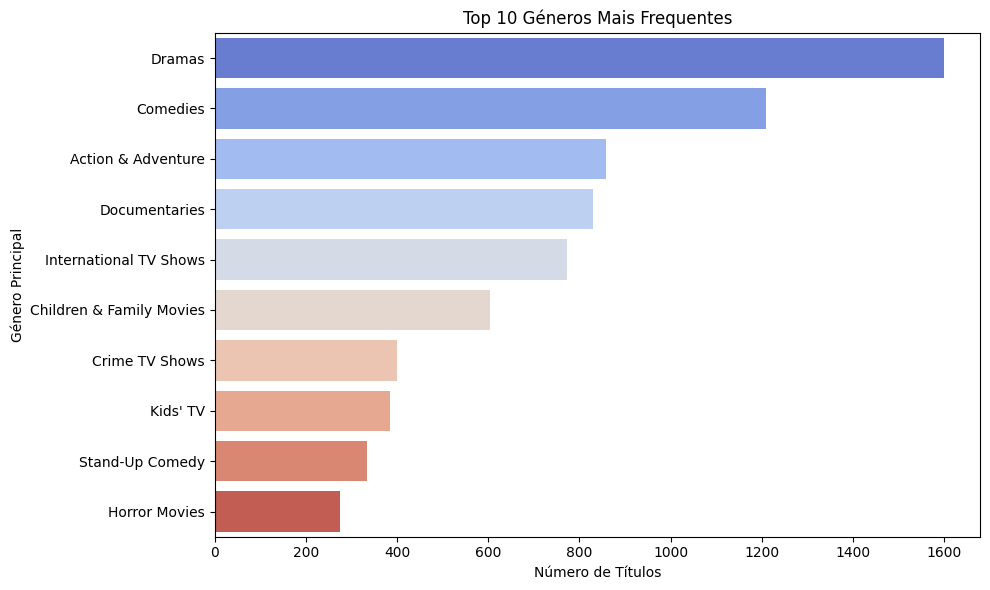

In [26]:
# Top 10 géneros mais frequentes
plt.figure(figsize=(10,6))
sns.barplot(x=top_generos.values, y=top_generos.index, palette='coolwarm')
plt.title('Top 10 Géneros Mais Frequentes')
plt.xlabel('Número de Títulos')
plt.ylabel('Género Principal')
plt.tight_layout()
plt.show()